### 1. FIFA_train.csv / FIFA_test.csv
- id : 선수 고유의 아이디
- name : 이름
- age : 나이
- continent : 대륙(선수 국적)
- contract_until : 계약기간
- position : 선호 포지션 ex) 공격수, 수비수 등
- prefer_foot : 선수 선호 발 ex) 오른발
- reputation : 선수 유명 정도 ex) 높은 수치일 수록 유명한 선수
- stat_overall : 선수 현재 능력치 
- stat_potential : 선수 발전 정도
- stat_skill_moves : 선수 개인기 능력치
- value : FIFA선정 이적 시장 가격 (단위 : 유로)


### 2. submission.csv (제출 파일 형식)
- id : 선수 고유의 아이디
- value : 예측된 선수 이적 시장 가격을 기입 

Q : 선수의 시장가격과 능력치 사이의 상관성 및 영향력 예측

In [136]:
import pandas as pd

In [137]:
import numpy as np

In [138]:
import matplotlib.pyplot as plt

In [139]:
import seaborn as sns

In [140]:
train = pd.read_csv('../study_4/FIFA_train.csv')

In [141]:
test = pd.read_csv('../study_4/FIFA_test.csv')

In [142]:
submission = pd.read_csv('../study_4/submission.csv')

In [143]:
print(train)
print(test)
print(submission) #나이, 지역, 포지션, 만료날짜, 쓰는 발, 평판, 오버롤, 포텐셜(어린나이일수록), 스킬(공격수), 가치 등이 영향 있을 것으로 보임

         id                name  age      continent contract_until position  \
0         0            L. Messi   31  south america           2021       ST   
1         3              De Gea   27         europe           2020       GK   
2         7           L. Suárez   31  south america           2021       ST   
3         8        Sergio Ramos   32         europe           2020       DF   
4         9            J. Oblak   25         europe           2021       GK   
...     ...                 ...  ...            ...            ...      ...   
8927  16925          S. Adewusi   18         africa           2019       MF   
8928  16936           C. Ehlich   19         europe           2020       DF   
8929  16941          N. Fuentes   18  south america           2021       DF   
8930  16942            J. Milli   18         europe           2021       GK   
8931  16948  N. Christoffersson   19         europe           2020       ST   

     prefer_foot  reputation  stat_overall  stat_po

In [144]:
print(train.describe(include='object'))
print(test.describe(include='object'))

           name continent contract_until position prefer_foot
count      8932      8932           8932     8932        8932
unique     8932         5             17        4           2
top     Arsénio    europe           2019       MF       right
freq          1      5322           2366     3428        6837
                name continent contract_until position prefer_foot
count           3828      3828           3828     3828        3828
unique          3828         5             18        4           2
top     Miguel Lopes    europe           2021       MF       right
freq               1      2269            985     1431        2915


In [145]:
train.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [146]:
test.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

In [147]:
print(train.corr())
print(test.corr())
print(submission.corr())

                        id       age  reputation  stat_overall  \
id                1.000000 -0.475785   -0.423739     -0.972374   
age              -0.475785  1.000000    0.263468      0.467345   
reputation       -0.423739  0.263468    1.000000      0.521389   
stat_overall     -0.972374  0.467345    0.521389      1.000000   
stat_potential   -0.630199 -0.231303    0.399183      0.665453   
stat_skill_moves -0.402455  0.039362    0.196582      0.400164   
value            -0.544280  0.087319    0.665982      0.658444   

                  stat_potential  stat_skill_moves     value  
id                     -0.630199         -0.402455 -0.544280  
age                    -0.231303          0.039362  0.087319  
reputation              0.399183          0.196582  0.665982  
stat_overall            0.665453          0.400164  0.658444  
stat_potential          1.000000          0.332578  0.611907  
stat_skill_moves        0.332578          1.000000  0.298500  
value                   0.6119

In [148]:
print(train.info())
print(test.info())
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------ 

### Group by

In [149]:
train.sort_values('value')

id         name  age      continent contract_until position  \
8737  16497  F. Nicastro   36         europe           2021       GK   
8534  16043   Y. Nishibe   37           asia           2021       GK   
8274  15465  K. Kitamoto   36           asia           2021       DF   
8158  15182  B. Lekström   37         europe           2018       GK   
8140  15143   C. Månsson   37         europe           2018       GK   
...     ...          ...  ...            ...            ...      ...   
14       26     M. Salah   26         africa           2023       MF   
1         3       De Gea   27         europe           2020       GK   
17       30         Isco   26         europe           2022       ST   
2         7    L. Suárez   31  south america           2021       ST   
0         0     L. Messi   31  south america           2021       ST   

     prefer_foot  reputation  stat_overall  stat_potential  stat_skill_moves  \
8737       right         1.0            53              53               1.0   
8534       right         1.0            55              55               1.0   
8274       right         1.0            57              57               2.0   
8158       right         1.0            58              58               1.0   
8140       right         1.0            58              58               1.0   
...          ...         ...           ...             ...               ...   
14          left         3.0            88              89               4.0   
1          right         4.0            91              93               1.0   
17         right         3.0            88              91               4.0   
2          right         5.0            91              91               3.0   
0           left         5.0            94              94               4.0   

            value  
8737      10000.0  
8534      10000.0  
8274      10000.0  
8158      10000.0  
8140      10000.0  
...           ...  
14     69500000.0  
1      72000000.0  
17     73500000.0  
2      80000000.0  
0     110500000.0  

[8932 rows x 12 columns]

In [150]:
print(train[['value', 'age']].groupby('age').count().sort_values('value')) #나이가 적을수록 가치 높음
print(train[['value', 'continent']].groupby('continent').count().sort_values('value')) # 국적이 유럽일수록 가치 높음
print(train[['value', 'contract_until', 'stat_overall']].groupby('value').count().sort_values('contract_until')) #value와 상관이 있기 위해서는 매개가 있어야 할 듯
print(train[['value', 'position']].groupby('position').count().sort_values('value')) #MF일수록 가치 높음
print(train[['value', 'prefer_foot']].groupby('prefer_foot').count().sort_values('value')) #오른발이 가치 높음. 왼발이 희귀할 것이라 생각했는데 다름
print(train[['value', 'reputation']].groupby('reputation').count().sort_values('value')) #유명정도가 낮을 수록 가치 높음
print(train[['value', 'stat_skill_moves']].groupby('stat_skill_moves').count().sort_values('value'))
print(train[['value', 'stat_overall', 'stat_potential', 'stat_skill_moves']].groupby('value').mean().sort_values('value'))

     value
age       
40       3
39      16
38      17
16      18
37      42
36      64
35      89
17     131
33     202
34     216
32     285
18     344
31     347
29     472
30     476
19     491
28     532
27     581
20     582
22     632
25     654
23     663
21     676
24     691
26     708
               value
continent           
oceania          175
africa           721
asia             787
south america   1927
europe          5322
             contract_until  stat_overall
value                                    
110500000.0               1             1
44500000.0                1             1
44000000.0                1             1
43500000.0                1             1
42000000.0                1             1
...                     ...           ...
525000.0                168           168
1000000.0               170           170
1200000.0               185           185
375000.0                186           186
1100000.0               232           232

[198 rows

In [151]:
#주성분분석 전 라벨링 후 상관정도 확인
from sklearn.preprocessing import LabelEncoder

category = ['continent', 'position', 'prefer_foot']
enc = LabelEncoder()
for feature in category:
    enc.fit(train[feature])
    print(feature, ':', enc.classes_, end=' => ')
    train[feature] = enc.transform(train[feature])
    print([i for i in range(len(enc.classes_))])

train.head()

continent : ['africa' 'asia' 'europe' 'oceania' 'south america'] => [0, 1, 2, 3, 4]
position : ['DF' 'GK' 'MF' 'ST'] => [0, 1, 2, 3]
prefer_foot : ['left' 'right'] => [0, 1]


id          name  age  continent contract_until  position  prefer_foot  \
0   0      L. Messi   31          4           2021         3            0   
1   3        De Gea   27          2           2020         1            1   
2   7     L. Suárez   31          4           2021         3            1   
3   8  Sergio Ramos   32          2           2020         0            1   
4   9      J. Oblak   25          2           2021         1            1   

   reputation  stat_overall  stat_potential  stat_skill_moves        value  
0         5.0            94              94               4.0  110500000.0  
1         4.0            91              93               1.0   72000000.0  
2         5.0            91              91               3.0   80000000.0  
3         4.0            91              91               3.0   51000000.0  
4         3.0            90              93               1.0   68000000.0

In [152]:
import seaborn as sns

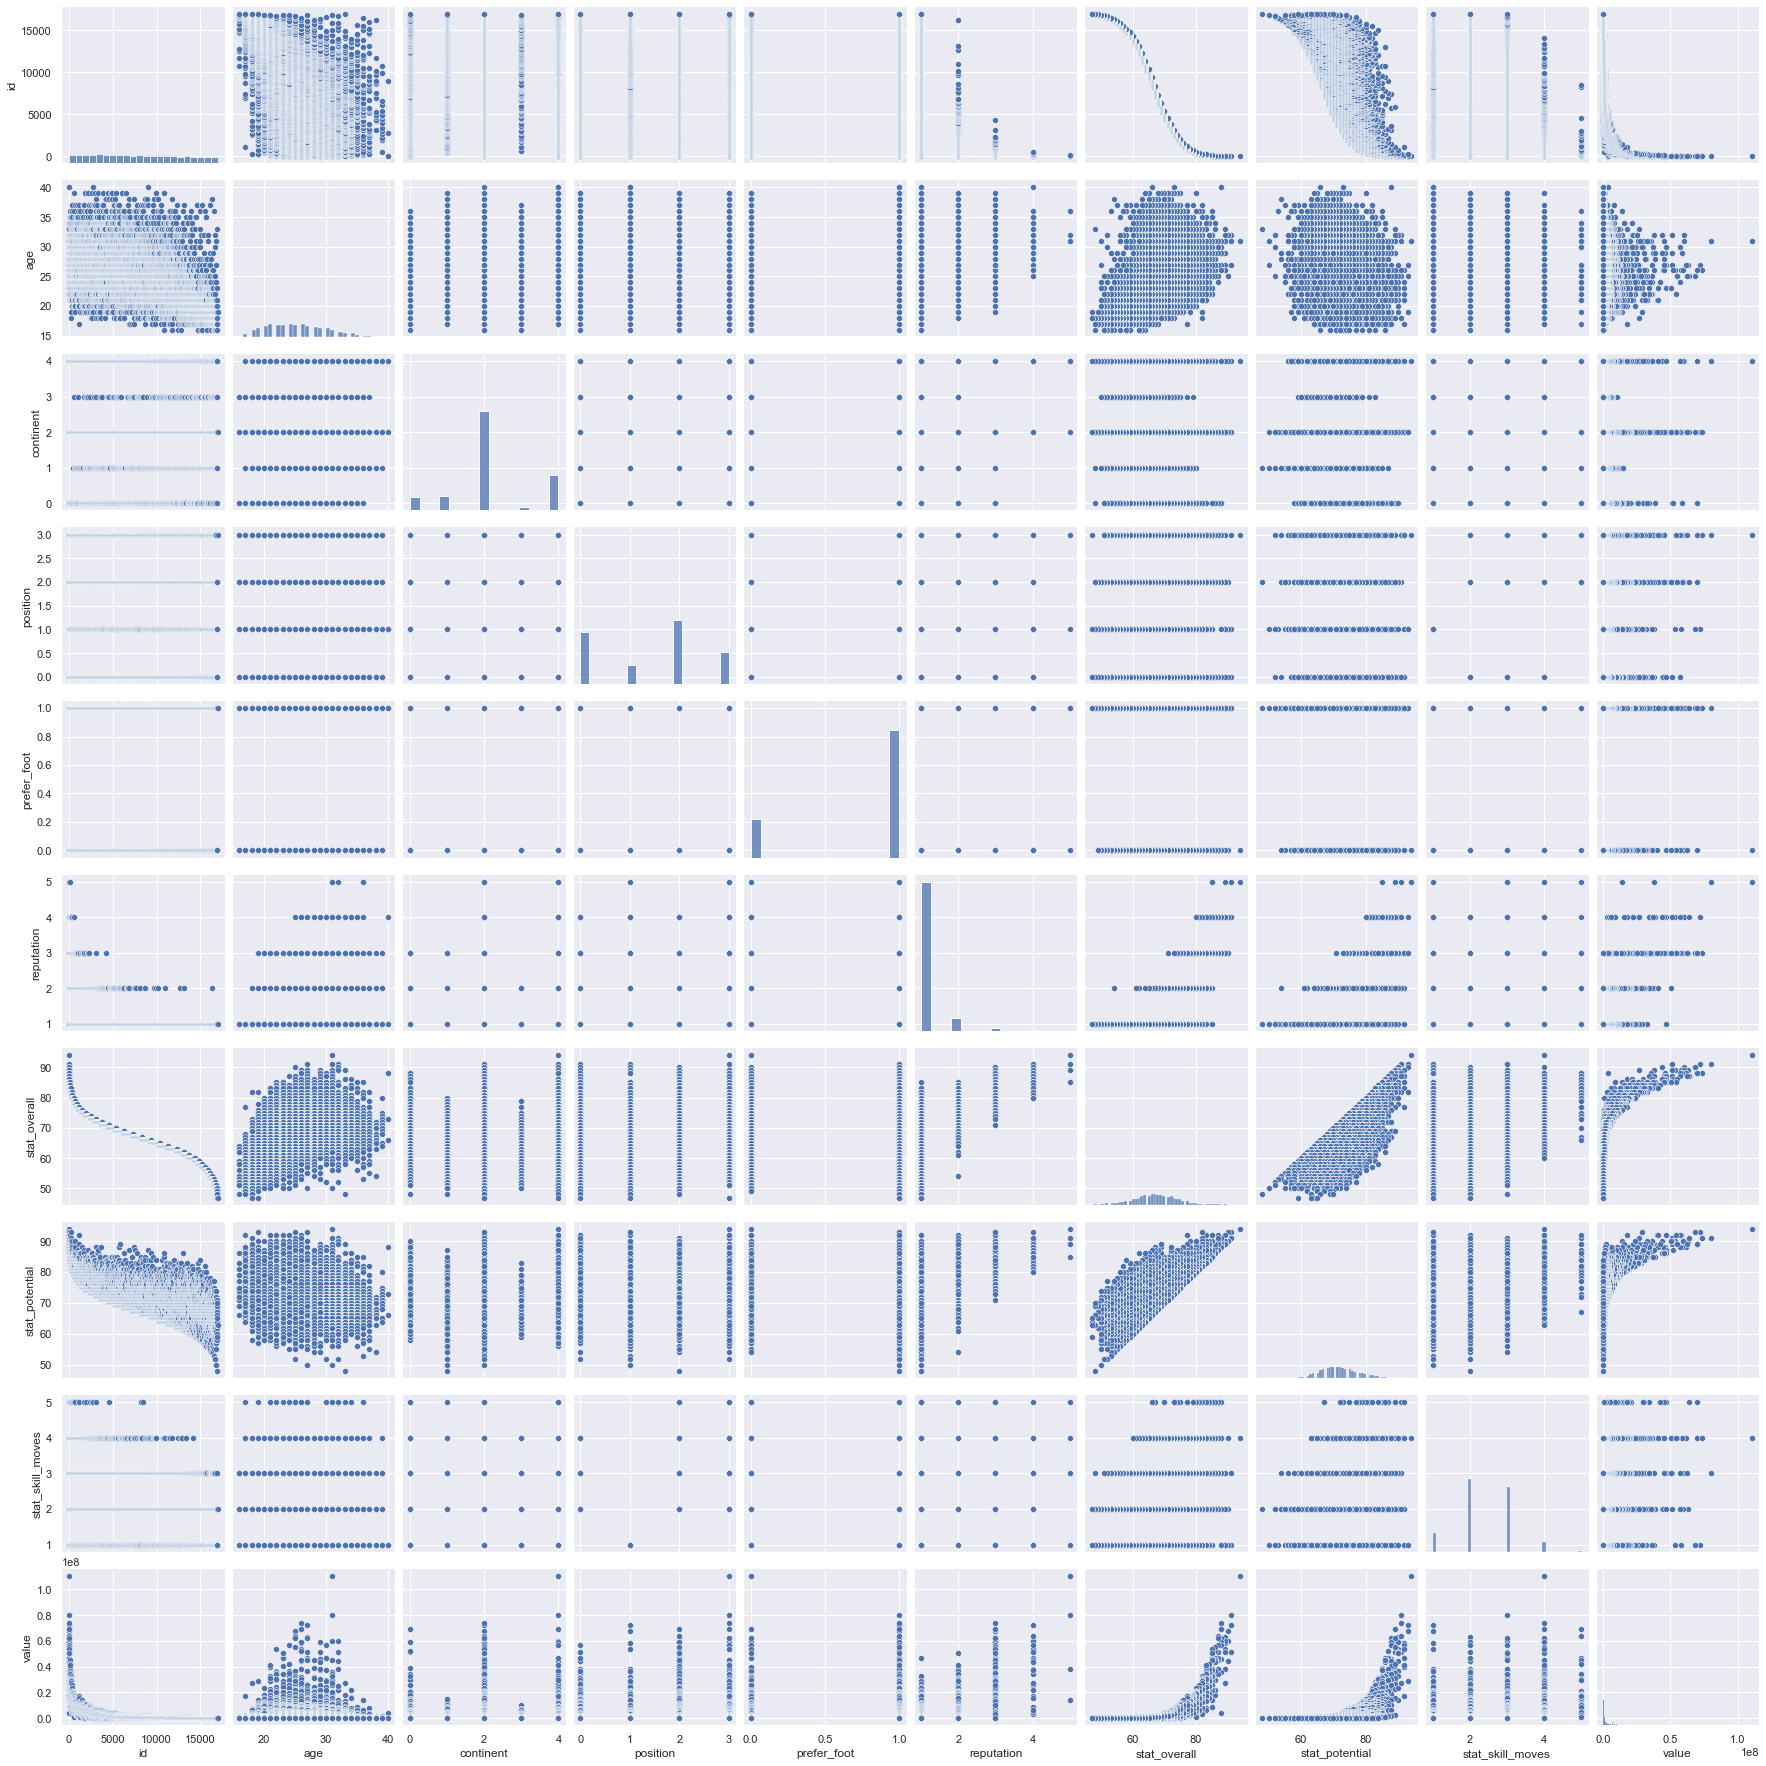

In [153]:
sns.pairplot(train, diag_kind='hist')
plt.show() #매개변수에 따라 상관정도가 다를 것으로 판단

In [154]:
train.drop(labels=['id', 'name'], axis = 1, inplace=True) #상관 정도를 모르기 때문에 우선 id만 제거

In [155]:
test.drop(labels=['id', 'name'], axis = 1, inplace=True)

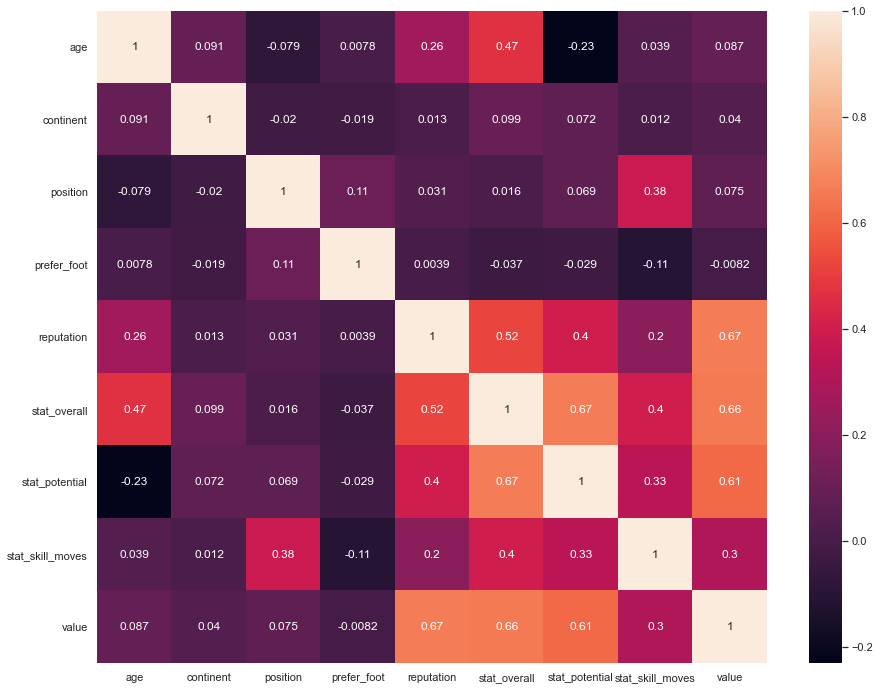

In [156]:
sns.heatmap(train.corr(), annot = True)
sns.set(rc = {'figure.figsize':(15,12)}) #reputation, stat_overall, stat_potential은 살리되, 나머지는 변수를 묶어주는 것이 나을 듯

### 주성분분석

<function matplotlib.pyplot.show(close=None, block=None)>

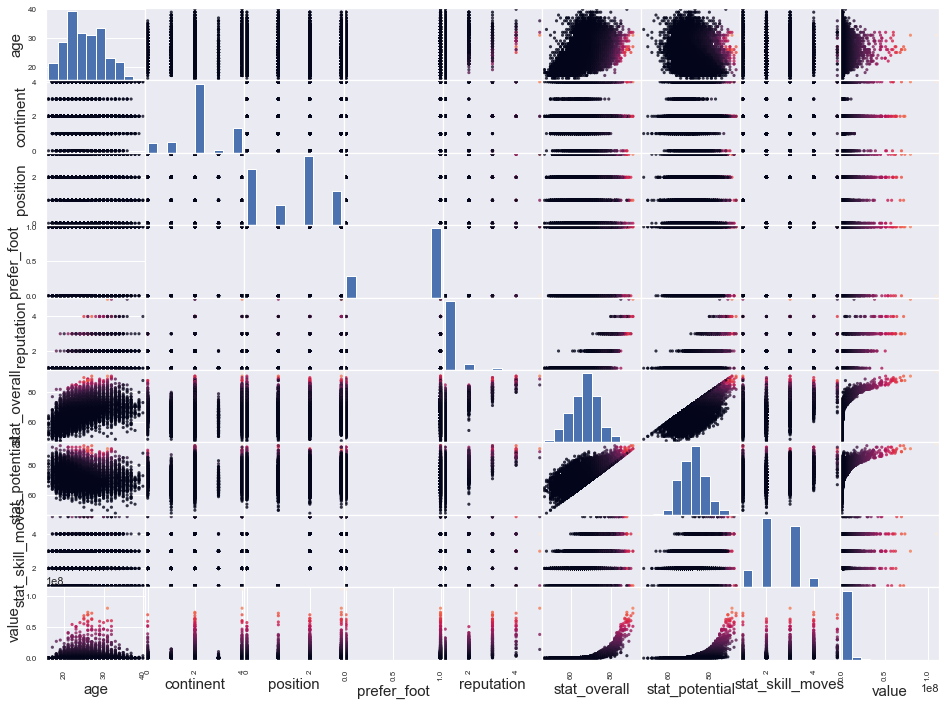

In [152]:
#데이터 시각화
from pandas.plotting import scatter_matrix

scatter_matrix(train, c=train['value'], marker='o', s=10, alpha =.8, figsize=(16,12))
plt.show

In [29]:
from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline

In [30]:
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

In [56]:
train

age  continent contract_until  position  prefer_foot  reputation  \
0      31          4           2021         3            0         5.0   
1      27          2           2020         1            1         4.0   
2      31          4           2021         3            1         5.0   
3      32          2           2020         0            1         4.0   
4      25          2           2021         1            1         3.0   
5      32          4           2019         0            1         3.0   
6      32          2           2020         2            0         4.0   
7      27          2           2023         2            1         3.0   
8      26          2           2022         1            1         3.0   
9      26          2           2024         1            0         4.0   
10     29          2           2023         2            1         4.0   
11     31          4           2020         3            1         4.0   
12     32          2           2021         1            1         5.0   
13     33          2           2020         0            0         4.0   
14     26          0           2023         2            0         3.0   
15     26          4           2021         2            1         3.0   
16     27          2           2022         3            1         3.0   
17     26          2           2022         3            1         3.0   
18     26          4           2023         3            1         3.0   
19     29          0           2021         2            1         3.0   
20     29          2           2021         0            1         4.0   
21     31          2           2022         1            0         4.0   
22     30          4   Jun 30, 2019         3            1         4.0   
23     40          2           2019         1            1         4.0   
24     24          2           2023         0            0         3.0   
25     27          0           2021         0            1         3.0   
26     25          2           2021         2            1         4.0   
27     25          2           2022         3            0         3.0   
28     29          2           2020         0            0         3.0   
29     31          2           2020         3            1         3.0   
30     30          2           2020         2            1         3.0   
31     30          2           2021         2            1         4.0   
32     31          2           2022         0            1         4.0   
33     26          0           2023         2            1         3.0   
34     26          2           2023         0            1         3.0   
35     25          2           2021         2            1         3.0   
36     27          4           2020         0            0         3.0   
37     27          4           2022         2            0         3.0   
38     28          2           2021         2            1         4.0   
39     27          2           2021         2            1         3.0   
40     29          2           2023         2            1         4.0   
41     31          0           2020         0            1         3.0   
42     33          4           2020         2            1         3.0   
43     34          2           2021         3            1         4.0   
44     23          2           2022         0            1         1.0   
45     23          2           2023         2            1         2.0   
46     22          2           2023         3            0         3.0   
47     25          4           2024         1            1         3.0   
48     23          2           2026         2            0         3.0   
49     26          2           2019         2            1         3.0   
50     27          2           2022         3            1         3.0   
51     30          4           2022         0            1         3.0   
52     28          2           2021         1            1         3.0   
53     29 

In [81]:
print(train.columns, len(train.columns), sep = '\n')

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')
10


In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scale = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index = train.index)

In [46]:
pd.set_option('display.max_rows',None) #모든 행 보기

In [157]:
train['date'] = train['contract_until'].apply(lambda  x:x[-4:])

In [158]:
train.drop(labels=['contract_until'], axis = 1, inplace=True)

In [64]:
train.date

0       2021
1       2020
2       2021
3       2020
4       2021
5       2019
6       2020
7       2023
8       2022
9       2024
10      2023
11      2020
12      2021
13      2020
14      2023
15      2021
16      2022
17      2022
18      2023
19      2021
20      2021
21      2022
22      2019
23      2019
24      2023
25      2021
26      2021
27      2022
28      2020
29      2020
30      2020
31      2021
32      2022
33      2023
34      2023
35      2021
36      2020
37      2022
38      2021
39      2021
40      2023
41      2020
42      2020
43      2021
44      2022
45      2023
46      2023
47      2024
48      2026
49      2019
50      2022
51      2022
52      2021
53      2022
54      2019
55      2021
56      2022
57      2021
58      2021
59      2020
60      2020
61      2021
62      2019
63      2019
64      2019
65      2022
66      2024
67      2021
68      2023
69      2022
70      2023
71      2022
72      2023
73      2022
74      2021
75      2020
76      2023

In [75]:
#주성분분석
pca = PCA(random_state=1107)
X_p = pca.fit_transform(train_scale)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.337946
1    0.597182
2    0.742696
3    0.836851
4    0.908759
5    0.950605
6    0.982803
7    0.995773
8    0.998490
9    1.000000
dtype: float64

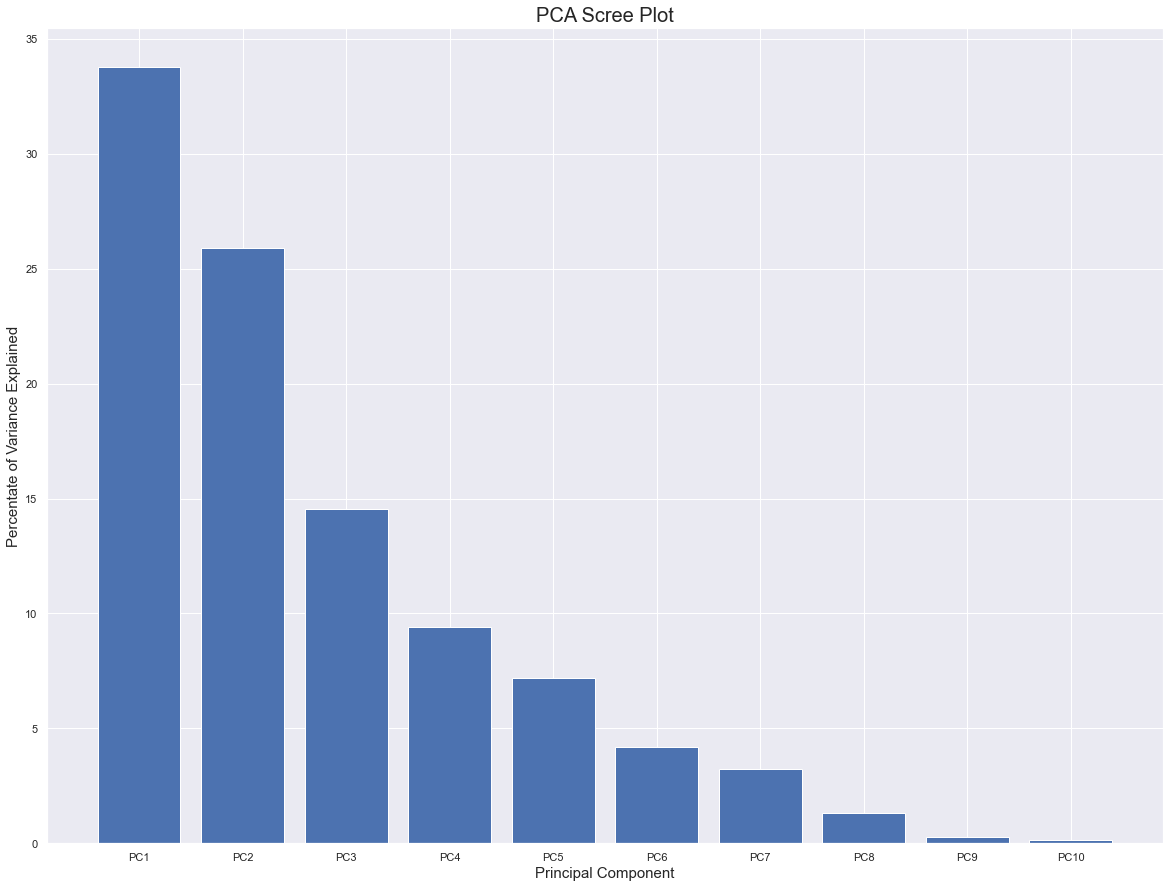

In [76]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [80]:
X_pp = pd.DataFrame(X_p[:,:5], columns = ['PC1','PC2','PC3','PC4'], index = train.index)
X_pp

PC1       PC2       PC3       PC4       PC5
0     0.557232  0.902195  0.666844  0.910853  0.255631
1    -0.161606 -0.240178  0.099917  0.602316  0.191590
2    -0.379839  0.489584  0.659995  0.768212  0.174562
3    -0.047656 -0.416458  0.160292  0.939695  0.196709
4    -0.162151 -0.240406  0.077075  0.488481  0.291041
5    -0.031681 -0.502825  0.603909  0.608933  0.057209
6     0.658774  0.582179  0.141121  0.889803  0.117413
7    -0.278205  0.124149  0.108327  0.580035  0.326372
8    -0.161929 -0.243442  0.081522  0.491461  0.296435
9     0.775488  0.095579  0.066391  0.507444  0.344729
10   -0.279492  0.191389  0.146081  0.779024  0.327283
11   -0.379520  0.474064  0.628878  0.631693  0.073247
12   -0.160288 -0.254389  0.127162  0.698516  0.038397
13    0.892364 -0.164195  0.100171  0.730965  0.009615
14    0.641954  0.601247 -0.382435  0.830280  0.432939
15   -0.264926  0.113000  0.572522  0.402914  0.253325
16   -0.396683  0.555400  0.131874  0.715784  0.340953
17   -0.397128  0.562924  0.133288  0.725435  0.408107
18   -0.385065  0.625575  0.637551  0.713154  0.519854
19   -0.294685  0.255410 -0.345500  0.908993  0.264499
20   -0.049960 -0.415307  0.131651  0.829330  0.302087
21    0.777744  0.074415  0.076634  0.546331  0.053966
22   -0.380199  0.470603  0.611924  0.578224  0.035173
23   -0.155755 -0.287968  0.142143  0.720282 -0.353743
24    0.887962 -0.137155  0.054315  0.537923  0.478159
25   -0.062636 -0.477296 -0.394170  0.733788  0.293751
26   -0.285131  0.334628  0.147026  0.894499  0.502359
27    0.542063  0.822129  0.066900  0.501866  0.292224
28    0.888716 -0.094851  0.075287  0.668439  0.175086
29   -0.394835  0.537396  0.137531  0.739797  0.089671
30   -0.278809  0.171264  0.114520  0.659048  0.100025
31   -0.279491  0.179040  0.131333  0.736662  0.163118
32   -0.047583 -0.489727  0.123709  0.741120  0.206574
33   -0.296645  0.262201 -0.363185  0.830610  0.443077
34   -0.049639 -0.480564  0.087274  0.586994  0.415797
35   -0.283082  0.255503  0.108851  0.684383  0.395852
36    0.901350 -0.099566  0.542705  0.489566  0.231960
37    0.668103  0.644160  0.590061  0.647062  0.388967
38   -0.280701  0.180420  0.113762  0.675180  0.209943
39   -0.283876  0.315625  0.132430  0.808172  0.370399
40   -0.282000  0.252853  0.148452  0.827028  0.357089
41   -0.060953 -0.496914 -0.389003  0.747351  0.064963
42   -0.263528  0.152393  0.606509  0.553334 -0.012493
43   -0.394147  0.533287  0.162629  0.835101  0.034155
44   -0.049766 -0.483526  0.043909  0.392925  0.470329
45   -0.283619  0.259092  0.092766  0.586905  0.558498
46    0.538727  0.899914  0.068059  0.542881  0.523156
47   -0.149512 -0.252046  0.550124  0.291294  0.401471
48    0.655465  0.534865  0.069086  0.520995  0.613706
49   -0.281140  0.172789  0.076051  0.532229  0.150237
50   -0.397346  0.547302  0.115343  0.648706  0.303395
51   -0.034124 -0.504184  0.580301  0.494827  0.210500
52   -0.161929 -0.264079  0.062225  0.415775  0.108279
53   -0.383171  0.540001  0.620936  0.625202  0.247802
54   -0.295715  0.242035 -0.381286  0.788917  0.136470
55   -0.265547  0.163242  0.608191  0.580888  0.104946
56   -0.281553  0.241918  0.125514  0.724771  0.278053
57   -0.277185  0.096356  0.095307  0.530480  0.021734
58   -0.393635  0.405252  0.094550  0.512666  0.044995
59   -0.031471 -0.522413  0.596202  0.554388 -0.061171
60    0.661164  0.424151  0.055298  0.454526 -0.084297
61   -0.396498  0.541434  0.136821  0.751809  0.153646
62    0.903575 -0.116378  0.560475  0.548416  0.006767
63   -0.047436 -0.506029  0.101864  0.679033 -0.017242
64   -0.045891 -0.513952  0.117429  0.726776 -0.116344
65   -0.395800  0.603057  0.203712  1.038428  0.090630
66   -0.037429 -0.485197  0.532153  0.293923  0.577646
67    0.899978 -0.094500  0.529839  0.435305  0.347771
68   -0.283856  0.254018  0.084027  0.551803  0.529905
69   -0.051089 -0.481662  0.040383  0.403003  0.480324
70   -0.268427  0.180806  0.566985  0.404115  0.444468
71   -0.266668  0.110412  0.545481  0.290349  0.331

ValueError: 'c' argument has 8932 elements, which is inconsistent with 'x' and 'y' with size 10.

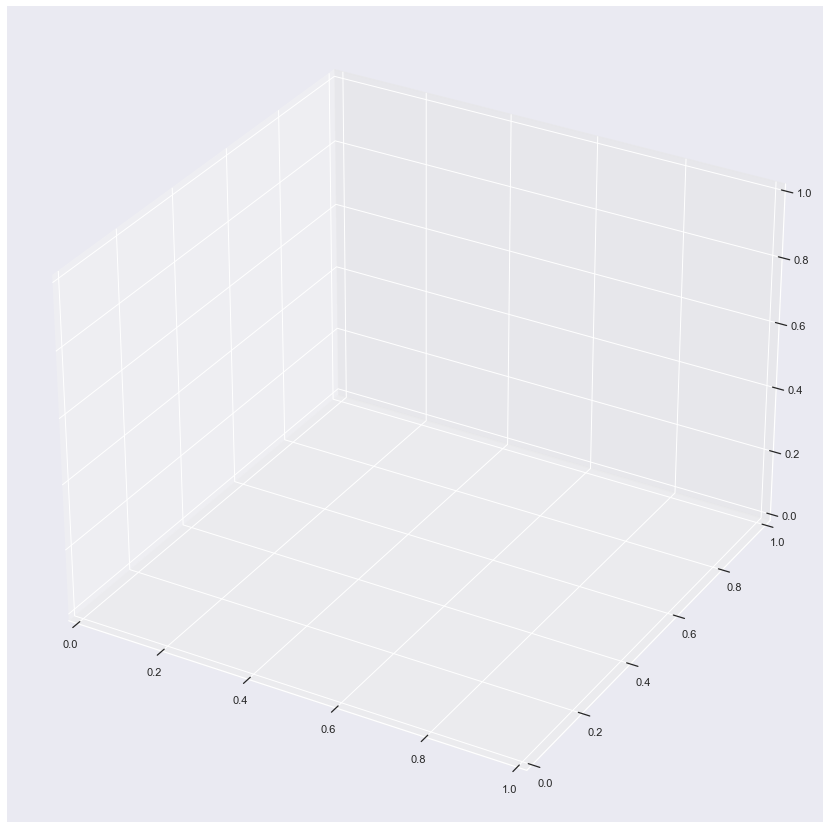

In [160]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_p[0],X_p[1],X_p[2],X_p[3], s=100, c = train.index)
plt.show()

### 탐색적 요인분석

In [86]:
train.describe()

age    continent     position  prefer_foot   reputation  \
count  8932.000000  8932.000000  8932.000000  8932.000000  8932.000000   
mean     25.209136     2.201523     1.453090     0.765450     1.130878   
std       4.635515     1.119411     1.120115     0.423741     0.423792   
min      16.000000     0.000000     0.000000     0.000000     1.000000   
25%      21.000000     2.000000     0.000000     1.000000     1.000000   
50%      25.000000     2.000000     2.000000     1.000000     1.000000   
75%      28.000000     2.000000     2.000000     1.000000     1.000000   
max      40.000000     4.000000     3.000000     1.000000     5.000000   

       stat_overall  stat_potential  stat_skill_moves         value  
count   8932.000000     8932.000000       8932.000000  8.932000e+03  
mean      67.091133       71.997201          2.401702  2.778673e+06  
std        6.854910        5.988147          0.776048  5.840982e+06  
min       47.000000       48.000000          1.000000  1.000000e+04  
25%       63.000000       68.000000          2.000000  3.750000e+05  
50%       67.000000       72.000000          2.000000  8.250000e+05  
75%       72.000000       76.000000          3.000000  2.600000e+06  
max       94.000000       94.000000          5.000000  1.105000e+08

In [87]:
from factor_analyzer import FactorAnalyzer

In [91]:
train_scale_1 = FactorAnalyzer(n_factors=6, method="ml", rotation="promax")
train_scale_1.fit(train_scale)
train_scale_1.loadings_

array([[ 8.43086926e-02, -2.03783889e-02,  7.89171617e-01,
        -2.83994448e-01, -4.80502830e-01, -2.23250280e-03],
       [-3.69839864e-02, -9.51824582e-03,  1.67327658e-01,
        -1.50408626e-04,  3.41850196e-02, -1.64472898e-02],
       [-6.08709716e-02,  1.01900010e+00, -7.30639208e-02,
        -5.46457252e-02,  2.69115671e-02, -5.72198650e-02],
       [ 1.40005054e-02,  9.89035149e-02,  1.84737789e-02,
         1.42204753e-02, -3.95436061e-03, -2.09200095e-01],
       [ 1.19861629e+00, -5.16491909e-02, -1.58862550e-01,
        -1.72449227e-01,  1.63583039e-01, -5.04765671e-02],
       [ 1.52287679e-01,  6.47291100e-03,  6.37497033e-01,
         3.01054410e-01,  7.72229820e-02,  1.32444343e-01],
       [ 2.40444604e-01,  3.30096482e-02,  2.28449600e-01,
         3.23081880e-01,  7.01818775e-01,  3.48031634e-02],
       [-1.11959021e-02,  4.14904209e-01, -1.61539950e-03,
         1.57661633e-02,  1.59453910e-02,  7.69109862e-01],
       [ 3.55664691e-01, -3.26968336e-02, -1.743

In [92]:
efa_result = pd.DataFrame(train_scale_1.loadings_)

<AxesSubplot:>

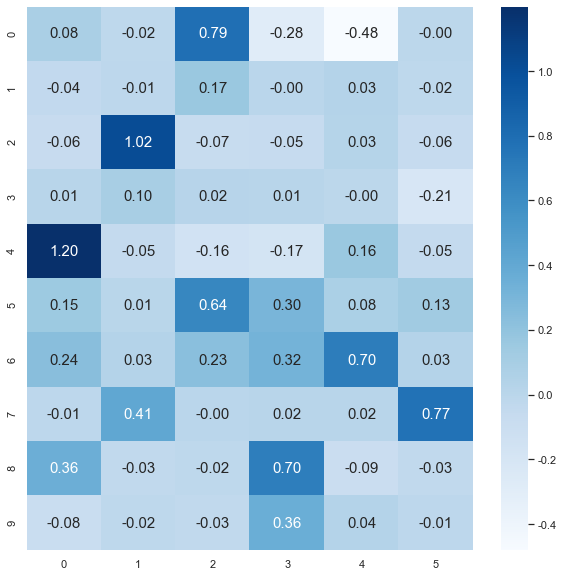

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [94]:
# 묶는게 의미 없음

### 예측모델 산출

In [99]:
print(train_scale.kurtosis())

age                 -0.525774
continent           -0.231138
position            -1.395580
prefer_foot         -0.429663
reputation          16.321376
stat_overall         0.111971
stat_potential       0.055385
stat_skill_moves    -0.155418
value               52.050515
date                -0.363772
dtype: float64


In [98]:
train_scale.skew()

age                 0.356824
continent           0.175414
position           -0.142241
prefer_foot        -1.253169
reputation          3.774495
stat_overall        0.026723
stat_potential      0.285905
stat_skill_moves    0.086536
value               5.885798
date                0.493837
dtype: float64

In [135]:
for col in []:
  print(col)
  print(train_scale[col].value_counts())

<function matplotlib.pyplot.show(close=None, block=None)>

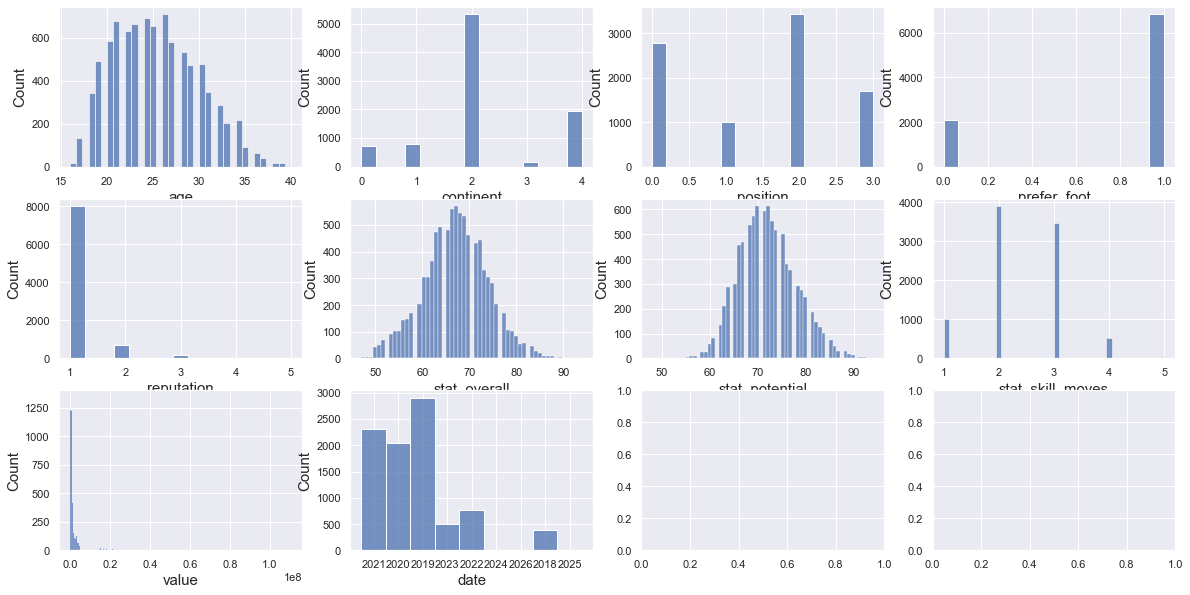

In [156]:
f, axes = plt.subplots(3,4, figsize=(20,10))
axes = axes.flatten()
for col, ax in zip(train.columns, axes):
  sns.histplot(data = train, x=col, ax=ax)
plt.show

### 분석

In [35]:
#주성분 분석 학습

In [159]:
from sklearn import datasets

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
from sklearn.decomposition import PCA

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
from sklearn.metrics import accuracy_score

In [165]:
print(train)

      age  continent  position  prefer_foot  reputation  stat_overall  \
0      31          4         3            0         5.0            94   
1      27          2         1            1         4.0            91   
2      31          4         3            1         5.0            91   
3      32          2         0            1         4.0            91   
4      25          2         1            1         3.0            90   
...   ...        ...       ...          ...         ...           ...   
8927   18          0         2            1         1.0            48   
8928   19          2         0            1         1.0            47   
8929   18          4         0            1         1.0            47   
8930   18          2         1            1         1.0            47   
8931   19          2         3            1         1.0            47   

      stat_potential  stat_skill_moves        value  date  
0                 94               4.0  110500000.0  2021  
1  

In [166]:
train.drop(labels=['age', 'continent', 'prefer_foot'], axis=1, inplace=True)

In [168]:
print(test)

      age      continent contract_until position prefer_foot  reputation  \
0      33         europe           2022       ST       right         5.0   
1      26  south america           2022       ST       right         5.0   
2      27         europe           2023       MF       right         4.0   
3      27         europe           2020       ST       right         4.0   
4      32         europe           2020       MF       right         4.0   
...   ...            ...            ...      ...         ...         ...   
3823   20           asia           2021       MF       right         1.0   
3824   18         europe           2018       GK       right         1.0   
3825   18  south america           2021       MF       right         1.0   
3826   18         europe           2020       ST       right         1.0   
3827   19           asia           2021       MF       right         1.0   

      stat_overall  stat_potential  stat_skill_moves  
0               94              

In [169]:
target = train['value'] #타겟 데이터 : value, 따로 저장

In [170]:
from sklearn import preprocessing

In [171]:
X = train
y = target

In [172]:
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1)

In [173]:
#데이터 표준화
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [174]:
#PCA
pca = PCA(n_components=4)
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

In [175]:
#차원축소 확인
print(X_tn_std.shape)
print(X_tn_pca.shape) #4개 90% 분산으로 설명

(6699, 7)
(6699, 4)


In [176]:
#공분산 행렬
print(pca.get_covariance())

[[0.98081545 0.05100322 0.0098095  0.02502526 0.41095771 0.0664199
  0.03089396]
 [0.05100322 1.00452742 0.52294097 0.44550947 0.16416514 0.63597489
  0.06120265]
 [0.0098095  0.52294097 1.03802243 0.63857296 0.39461831 0.642115
  0.16252708]
 [0.02502526 0.44550947 0.63857296 0.97201134 0.38417143 0.59534225
  0.27846235]
 [0.41095771 0.16416514 0.39461831 0.38417143 0.9557189  0.29539366
  0.06059662]
 [0.0664199  0.63597489 0.642115   0.59534225 0.29539366 1.05510464
  0.22534771]
 [0.03089396 0.06120265 0.16252708 0.27846235 0.06059662 0.22534771
  0.9948449 ]]


In [177]:
#고유값 확인
print(pca.singular_values_)
#고유백터 확인
print(pca.components_)

[142.83976581  91.62473271  80.77898668  67.40872713]
[[ 0.09710598  0.41221478  0.48733168  0.46216807  0.30358456  0.4955072
   0.17851316]
 [-0.77004276  0.1931907   0.09852852  0.07242066 -0.57131562  0.14480028
   0.08596637]
 [ 0.02647165 -0.32060343 -0.10348457  0.12037014 -0.02423988 -0.06936102
   0.93054615]
 [ 0.45954754  0.54810751 -0.31451934 -0.31495094 -0.4350126   0.25540409
   0.1892366 ]]


In [178]:
#설명 분산 및 비율
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[3.04616284 1.25337289 0.97420793 0.67840198]
[0.43510116 0.17902654 0.13915179 0.0969001 ]


In [179]:
#차원축소 데이터 확인
pca_columns = ['pca_comp1', 'pca_comp2', 'pca_comp3', 'pca_comp4']
X_tn_pca_df = pd.DataFrame(X_tn_pca,
                           columns=pca_columns)
X_tn_pca_df['target'] = y_tn
X_tn_pca_df.head(5)

pca_comp1  pca_comp2  pca_comp3  pca_comp4       target
0  -0.860605   1.135480  -0.135489  -0.500158  110500000.0
1  -0.793359  -1.013495   0.301533   0.794653   72000000.0
2   0.299829   1.583718  -1.607327   0.454366   80000000.0
3   0.260390  -0.870147  -0.119959  -0.469666   51000000.0
4  -1.248663   1.195223   0.731716   0.740690   68000000.0

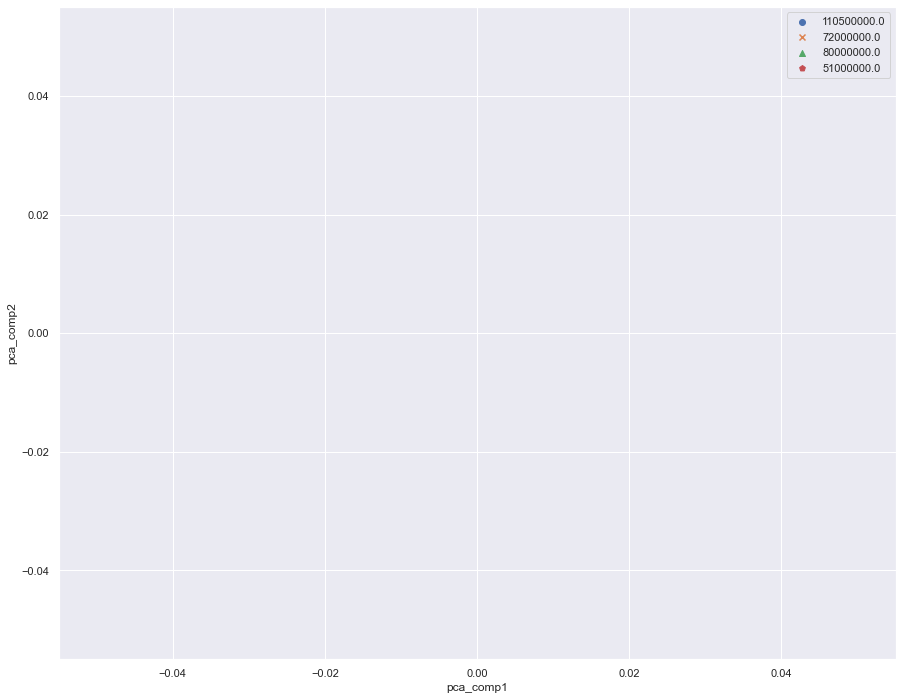

In [201]:
df = X_tn_pca_df
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]
df_2 = df[df['target']==2]
df_3 = df[df['target']==3]

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']
X_14 = df_3['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']
X_24 = df_3['pca_comp2']

target_0 = target[0]
target_1 = target[1]
target_2 = target[2]
target_3 = target[3]

plt.scatter(X_11, X_21,
           marker='o',
           label=target_0)
plt.scatter(X_12, X_22,
           marker='x',
           label=target_1)
plt.scatter(X_13, X_23,
           marker='^',
           label=target_2)
plt.scatter(X_14, X_24,
           marker='p',
           label=target_3)
plt.xlabel('pca_comp1')
plt.ylabel('pca_comp2')
plt.legend()
plt.show()

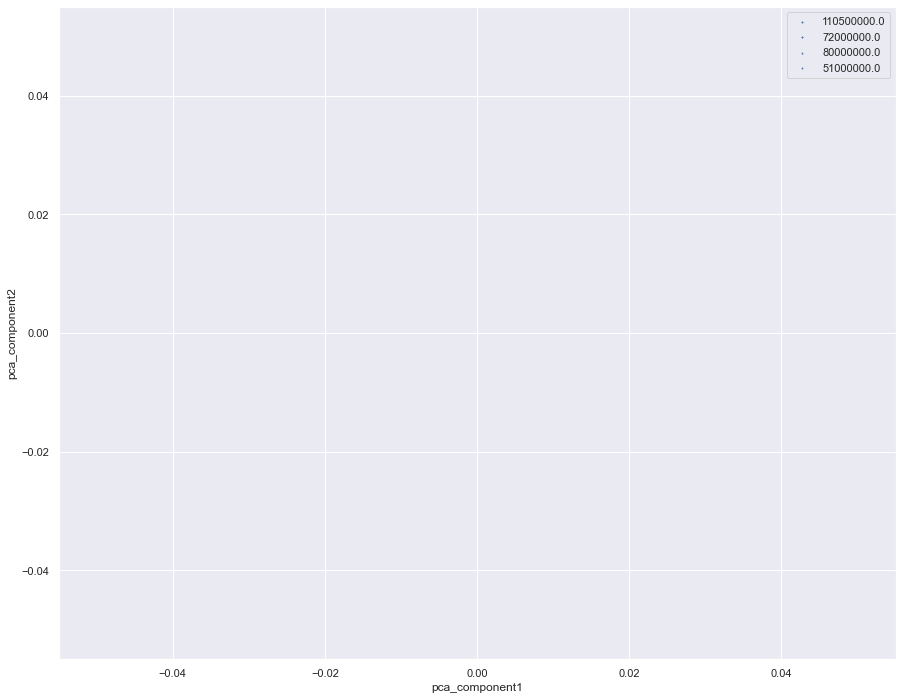

In [200]:
df = X_tn_pca_df
markers=['o','x','^','p']

for i, mark in enumerate(markers):
    df_i = df[df['target']== i]
    target_i = target[i]
    X1 = df_i['pca_comp1']
    X2 = df_i['pca_comp2']
    X3 = df_i['pca_comp3']
    X4 = df_i['pca_comp4']
    plt.scatter(X1, X2, X3, X4,
                marker=mark,
                label=target_i)
    
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

In [182]:
#엘라스틱 넷 사용 : 변수 몇개가 다중공선성 의심, 라쏘의 경우 덜 중요한 변수의 가중치를 줄이기 때문에 모델 자체가 불량이 될 가능성 존재)
from sklearn.linear_model import ElasticNet
clf_elastic = ElasticNet(alpha=0.01, l1_ratio=0.81)
clf_elastic.fit(X_tn_pca, y_tn)

ElasticNet(alpha=0.01, l1_ratio=0.81)

In [183]:
#추정계수
print(clf_elastic.coef_)

[2920478.42591725  852680.48958053 -408266.76951856 1502062.21495874]


In [184]:
#상수항
print(clf_elastic.intercept_)

2797881.773399015


In [185]:
pred_elastic = clf_elastic.predict(X_tn_pca)

In [190]:
#R2
from sklearn.metrics import r2_score
print(r2_score(y_tn, pred_elastic))

0.8230122925183411


In [192]:
#mse
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_tn, pred_elastic))

6155918490457.388
